In [1]:
import geopandas

/tmp/ipykernel_482139/1529612126.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas


In [2]:
gdf = geopandas.read_parquet('repub_lean.parquet')

<AxesSubplot:>

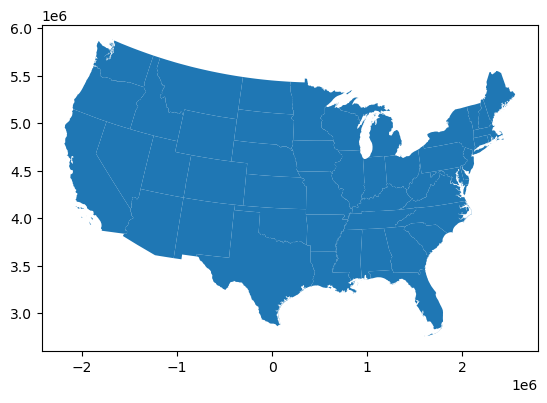

In [3]:
gdf.plot()

<AxesSubplot:>

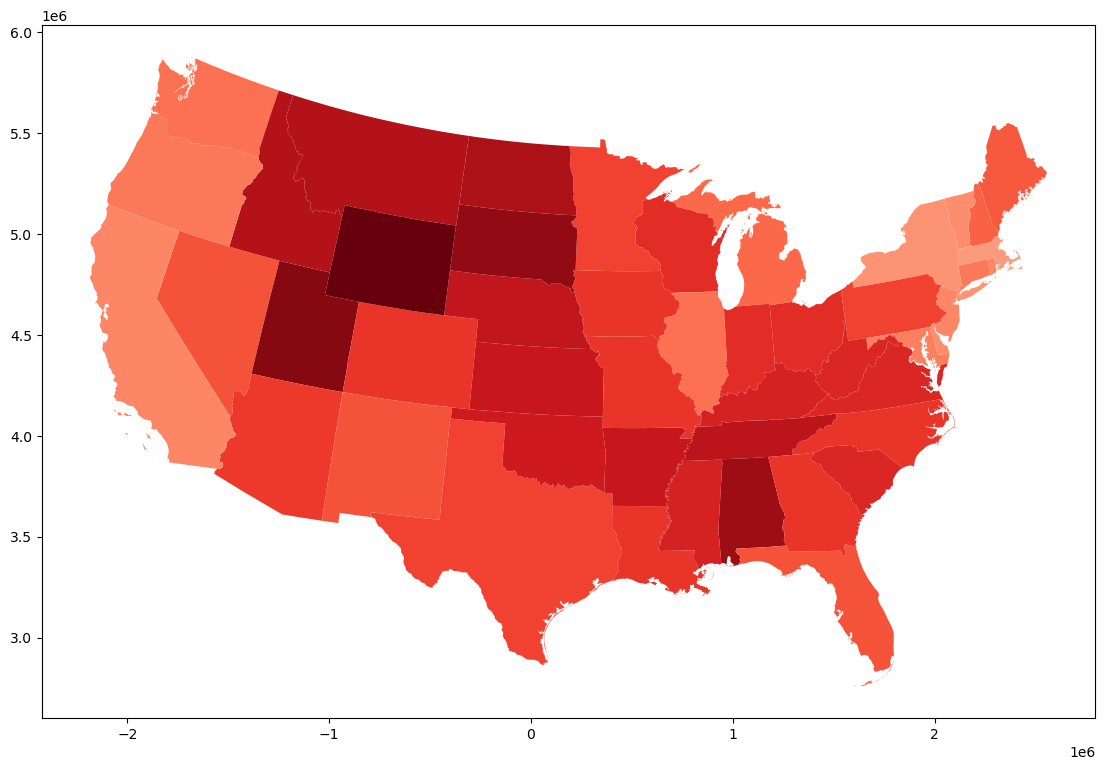

In [4]:
gdf.plot(column='rep_int', cmap='Reds', figsize=(16,9))

In [7]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Spatial Lag Leaning Republican')

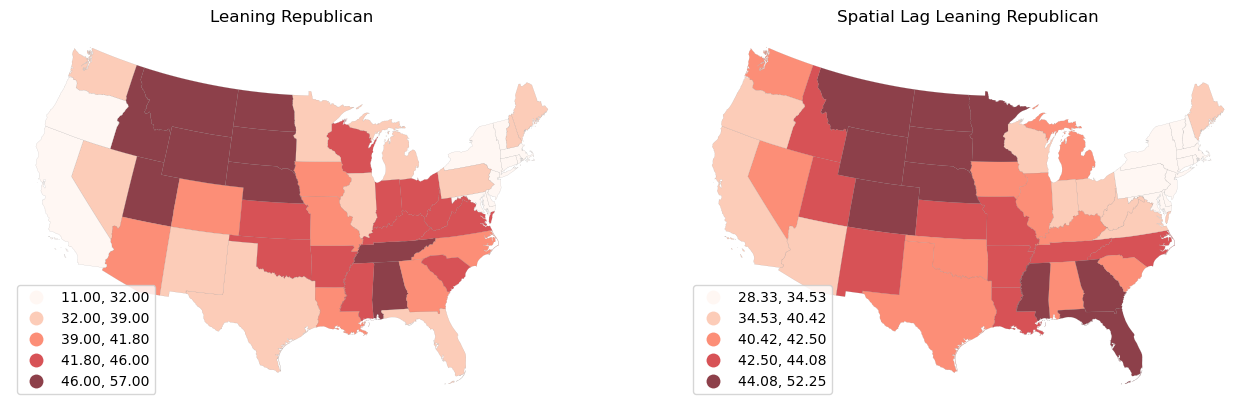

In [8]:
f, axs = plt.subplots(1, 2, figsize=(16, 9))
ax1, ax2 = axs



gdf.plot(column='rep_int',
         cmap='Reds',
         scheme='quantiles',
         k=5,
         edgecolor='grey',
         linewidth=0.1,
         alpha=0.75,
         legend=True,
         legend_kwds={'loc': 'lower left'},
         ax =ax1,
        )
ax1.set_axis_off()
ax1.set_title("Leaning Republican")


gdf.plot(column='lag_rep_int',
         cmap='Reds',
         scheme='quantiles',
         k=5,
         edgecolor='grey',
         linewidth=0.1,
         alpha=0.75,
         legend=True,
         legend_kwds={'loc': 'lower left'},
         ax =ax2,
        )
ax2.set_axis_off()
ax2.set_title("Spatial Lag Leaning Republican")

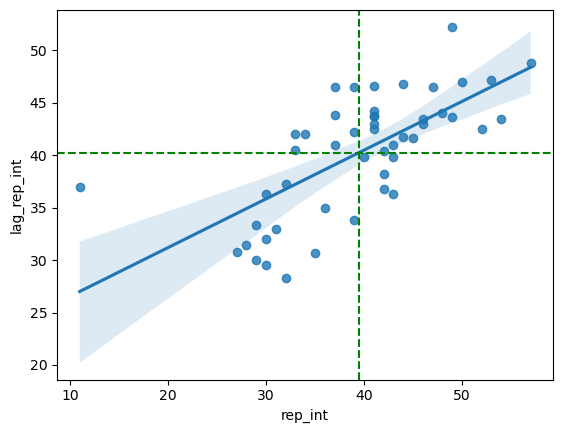

In [9]:
import seaborn as sns
_ = sns.regplot(x='rep_int', y='lag_rep_int', data=gdf)
plt.axhline(y=gdf.lag_rep_int.mean(), color='g', linestyle='--')
plt.axvline(x=gdf.rep_int.mean(), color='g', linestyle='--')

## Join Counts

In [12]:
gdf.rep_int.median()

41.0

In [13]:
hi_rep = gdf.rep_int >= gdf.rep_int.median()
hi_rep

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7      True
8      True
9     False
10    False
11     True
12    False
13     True
14    False
15     True
16    False
17     True
18    False
19     True
20    False
21     True
22    False
23    False
24    False
25    False
26     True
27     True
28    False
29     True
30     True
31     True
32     True
33     True
34    False
35     True
36     True
37     True
38    False
39    False
40     True
41     True
42    False
43     True
44     True
45    False
46     True
47     True
48     True
Name: rep_int, dtype: bool

In [14]:
gdf['hi_rep'] = hi_rep

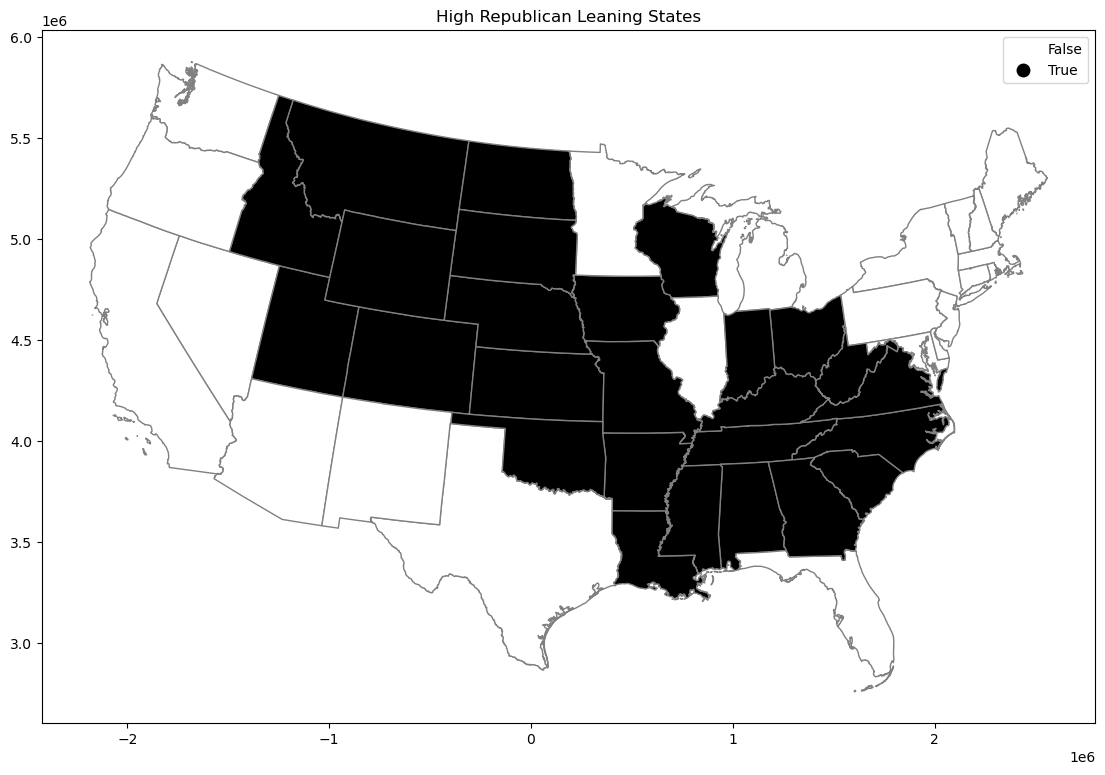

In [15]:
gdf.plot(column='hi_rep', categorical=True, legend=True, figsize=(16,9), cmap='Greys', edgecolor='grey')
_ = plt.title("High Republican Leaning States")

In [12]:
gdf.hi_rep.sum() # number of high republican leaning states

26

In [16]:
gdf.shape[0] -  gdf.hi_rep.sum() # number of low republican leaning states

23

In [18]:
import libpysal
import esda

In [19]:
import numpy
rids = numpy.random.permutation(gdf.index.values)

In [20]:
rids

array([ 1,  0, 12, 14, 30, 24,  5,  2, 25, 28, 13, 44, 35, 38, 40, 41, 16,
       32, 42, 36, 10, 26,  3, 31,  8, 43, 47, 33, 17, 29, 27, 19,  9,  4,
       48, 21, 23, 37, 20, 45, 22, 15, 34, 46, 18, 11, 39,  7,  6])

In [21]:
gdf['random_values'] = gdf.hi_rep.values[rids]

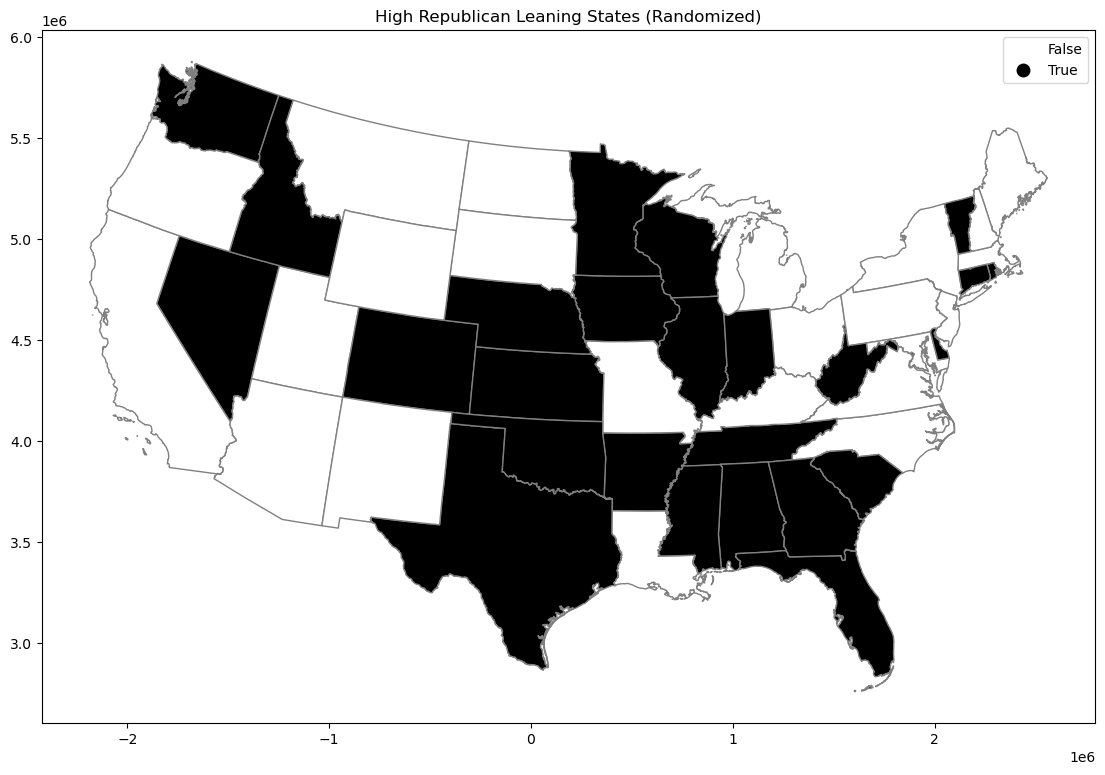

In [22]:
gdf.plot(column='random_values', categorical=True, legend=True, figsize=(16,9), cmap='Greys', edgecolor='grey')
_ = plt.title("High Republican Leaning States (Randomized)")

In [23]:
w = libpysal.weights.Queen.from_dataframe(gdf)

In [24]:
w.n

49

In [27]:
numpy.random.seed(12345)
jc = esda.join_counts.Join_Counts(gdf.hi_rep, w)

In [28]:
jc.bb

52.0

In [29]:
jc.autocorr_pos # BB + WW

78.0

In [30]:
jc.expected

Neighbor,W,B
Focal,,
W,15.800459,25.699541
B,25.699541,41.800459


In [31]:
jc.crosstab

Neighbor,W,B
Focal,,
W,26.0,15.5
B,15.5,52.0


In [32]:
jc.p_sim_autocorr_pos

0.001

In [33]:
import seaborn

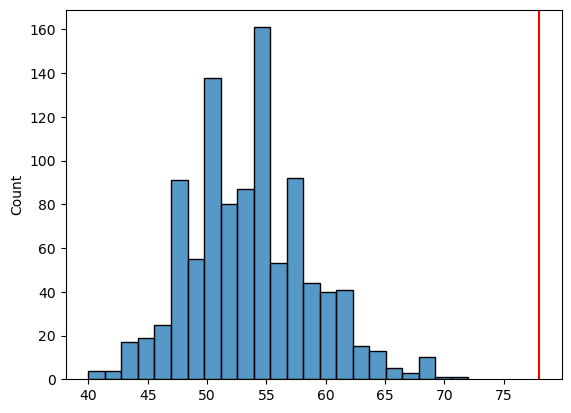

In [34]:
ax = seaborn.histplot(jc.sim_autocurr_pos)
_ = plt.axvline(jc.autocorr_pos, 0, 80, color='r')

In [29]:
jc_r = esda.join_counts.Join_Counts(gdf.random_values, w)

In [30]:
jc_r.crosstab

Neighbor,W,B
Focal,,
W,21.0,30.0
B,30.0,28.0


In [31]:
jc_r.expected

Neighbor,W,B
Focal,,
W,23.862385,27.137615
B,27.137615,30.862385


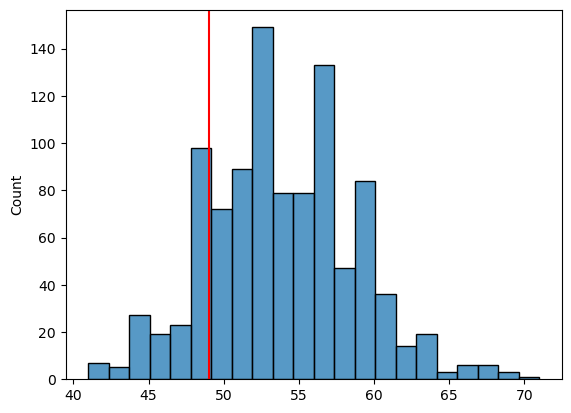

In [32]:
ax = seaborn.histplot(jc_r.sim_autocurr_pos)
_ = plt.axvline(jc_r.autocorr_pos, 0, 80, color='r')